# Pandas and matplotlib

In this session we'll do a brief overview of two libraries useful for scientific computing:

- `pandas` is a library which provides datastructures useful for storing and processing tabular data and especially time series. It has some similarities to the statistical language `R`. 
- `matplotlib` is low-level Python library for plotting. 

Both of these libraries are useful in their basic form, but both have many intricacies and can be error prone. 

## Pandas


In [1]:
import pandas as pd

Pandas has a useful function `pd.read_csv` for loading CSV files. Tabular data is stored in a DataFrame object. The DataFrame will be pretty-printed by the Jupyter notebook:

In [2]:
data = pd.read_csv("population.csv", sep='\t', index_col='year')
data.head()

,hare,lynx,carrot
year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600


A DataFrame has labels for columns (similar to a numpy structured array) but it also can have labels for rows. 
The set of labels for rows is called an index. This is especially useful for time series. The index can be accessed via the `.index` attribute:

In [3]:
print(data.index)

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
            1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920],
           dtype='int64', name='year')


The data in a DataFrame can be accessed by column labels or by row labels:

In [4]:
# Print the lynx colum
print(data['lynx'])

year
1900     4000.0
1901     6100.0
1902     9800.0
1903    35200.0
1904    59400.0
1905    41700.0
1906    19000.0
1907    13000.0
1908     8300.0
1909     9100.0
1910     7400.0
1911     8000.0
1912    12300.0
1913    19500.0
1914    45700.0
1915    51100.0
1916    29700.0
1917    15800.0
1918     9700.0
1919    10100.0
1920     8600.0
Name: lynx, dtype: float64


In order to access data by row label, use the `.loc` attribute:

In [5]:
# print the 1919 row
print(data.loc[1919])
# print the range of data between 1900 and 1905
print(data.loc[1900:1905])

hare      16200.0
lynx      10100.0
carrot    41300.0
Name: 1919, dtype: float64
         hare     lynx  carrot
year                          
1900  30000.0   4000.0   48300
1901  47200.0   6100.0   48200
1902  70200.0   9800.0   41500
1903  77400.0  35200.0   38200
1904  36300.0  59400.0   40600
1905  20600.0  41700.0   39800


In order to access data by row position, use the `.iloc` attribute:

In [6]:
# print the penultimate row
print(data.iloc[-2])

hare      16200.0
lynx      10100.0
carrot    41300.0
Name: 1919, dtype: float64


DataFrames can be converted to the underlying numpy array

In [7]:
print(data.as_matrix())

[[ 30000.   4000.  48300.]
 [ 47200.   6100.  48200.]
 [ 70200.   9800.  41500.]
 [ 77400.  35200.  38200.]
 [ 36300.  59400.  40600.]
 [ 20600.  41700.  39800.]
 [ 18100.  19000.  38600.]
 [ 21400.  13000.  42300.]
 [ 22000.   8300.  44500.]
 [ 25400.   9100.  42100.]
 [ 27100.   7400.  46000.]
 [ 40300.   8000.  46800.]
 [ 57000.  12300.  43800.]
 [ 76600.  19500.  40900.]
 [ 52300.  45700.  39400.]
 [ 19500.  51100.  39000.]
 [ 11200.  29700.  36700.]
 [  7600.  15800.  41800.]
 [ 14600.   9700.  43300.]
 [ 16200.  10100.  41300.]
 [ 24700.   8600.  47300.]]


Many standard methods can be applied to rows and columns of a DataFrame:

In [8]:
# Mean per column
print(data.mean(axis=0))
# Sum per row
print(data.sum(axis=1))

hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64
year
1900     82300.0
1901    101500.0
1902    121500.0
1903    150800.0
1904    136300.0
1905    102100.0
1906     75700.0
1907     76700.0
1908     74800.0
1909     76600.0
1910     80500.0
1911     95100.0
1912    113100.0
1913    137000.0
1914    137400.0
1915    109600.0
1916     77600.0
1917     65200.0
1918     67600.0
1919     67600.0
1920     80600.0
dtype: float64


### Exercise 7.0

Print out all years where the population of lynxes in more than the population of hares and also more than the population of carrots. 
You can create a boolean index appropriate for use with the the `.loc` attribute by simply using a boolean comparison operator `>`. You can combine boolean indices using `&` (AND) and `|` (OR).

In [9]:
# -------------------
more_than_hare = data['lynx'] > data['hare']
more_than_carrot = data['lynx'] > data['carrot']

data.loc[more_than_hare & more_than_carrot]

,hare,lynx,carrot
year,,,
1904,36300.0,59400.0,40600
1905,20600.0,41700.0,39800
1915,19500.0,51100.0,39000


## Matplotlib

The IPython command `%pylab --inline` imports plotting functions from module pylab and also all the functions from `numpy`. It's often better to avoid these imports and use prefixed functions instead, by using this command: `%pylab --inline --no-import-all`. See (https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-pylab)[https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-pylab] for more information.

In [10]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


Now modules `numpy` (also renamed as `np`) and `pyplot` (also renamed as `plt`) are available in the notebook.

## Basic plots

### Line plot

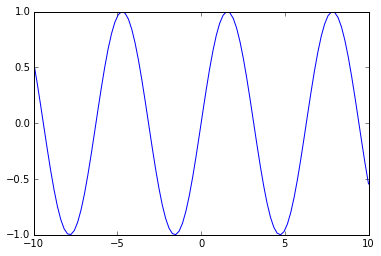

In [11]:
x = numpy.linspace(-10, 10, 100)
y = numpy.sin(x)
plt.plot(x, y)

#### Customizing plots

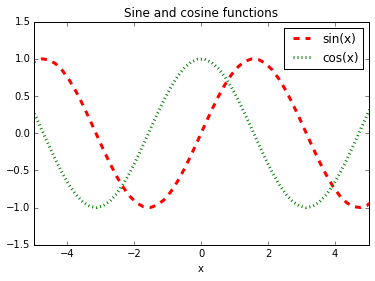

In [12]:
# Change style of line
# Add line label
plt.plot(x, y, linewidth=3, linestyle='dashed', color='red', label='sin(x)')
# Add another line
plt.plot(x, numpy.cos(x), linewidth=3, linestyle='dotted', color='green', label='cos(x)')
# Change axis ranges
plt.xlim(-5, 5)
plt.ylim(-1.5, 1.5)
# Add x-axis label
plt.xlabel("x")
# Add title
plt.title("Sine and cosine functions")
# Add legend, which will use the labels added to lines
plt.legend(loc='upper right')
# Save plot
plt.savefig('sin-cos.png')

#### Exercise 7.1

Load the data from [populations.csv](populations.csv) into a pandas DataFrame. Create a line plot with the year on the x-axis and the population of each species on the y-axis. Add axis labels, a legend and a title. The line for each species should have a different color.


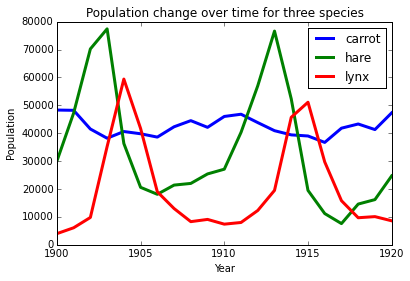

In [13]:
popu = pd.read_csv("population.csv", sep='\t', index_col='year')
for species in ['carrot', 'hare', 'lynx']:
    plt.plot(popu.index, popu[species], linewidth=3, label=species)
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population change over time for three species")

### Scatter plot

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


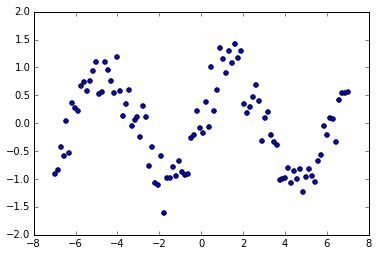

In [14]:
# Noisy sine function
x = numpy.linspace(-7, 7, 100)
e = numpy.random.normal(0, 0.3, 100)
y = numpy.sin(x) + e
plt.scatter(x, y)

#### Customizing points

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


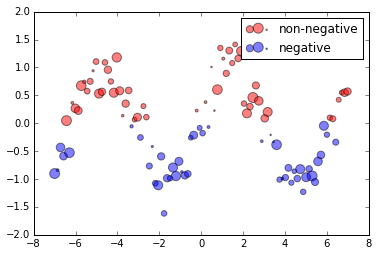

In [15]:
# Assign random area sizes to points
size = numpy.random.uniform(1,100,100)
# Plot y-values below 0 a different color
neg = y < 0.0
nonneg = y >= 0.0
plt.scatter(x[nonneg], y[nonneg], s=size, alpha=0.5, c='red', label='non-negative') 
plt.scatter(x[neg], y[neg], s=size, alpha=0.5, c='blue', label='negative')
# add transparency to better see overlapping points
plt.legend(loc='best')

#### Exercise 7.2

Load the iris dataset into a pandas DataFrame (you can use the function `pd.read_table` with the keyword argument `delim_whitespace=True` to read tabular data formatted as a space-delimited text file). 
Create a scatter plot of the first feature (Sepal length) vs the second feature (Sepal width). Make the points for different species a different color. Add title, axis labels, and a legend.

In [16]:
iris = pd.read_table("iris.txt", delim_whitespace=True, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"])

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


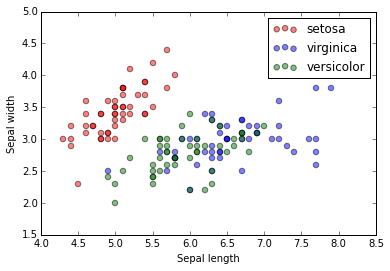

In [17]:
for species, color in [('setosa', 'red'), 
                       ('virginica', 'blue'), 
                       ('versicolor', 'green')]:
    z = iris['Species'] == species
    plt.scatter(iris[z]['SepalLength'], iris[z]['SepalWidth'], s=30, c=color, alpha=0.5, label=species)
plt.legend(loc='best')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

#### Exercise 7.3

Given a $m\times n$ matrix $X$ with $n$ data points and $n$ features, we can project the points to $d$ dimensional space  and store the result in matrix $X_d$ using Principal Component Analysis:
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=D)
X_d = pca.fit_transform(X)
```

Project the 4-dimensional iris dataset to 2 dimensions using PCA and plot the result, with principal component 1 on the x-axis and principal component 2 on the y-axis. Label the axes and use different colors for each species.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']].as_matrix()
X_D = pca.fit_transform(X)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


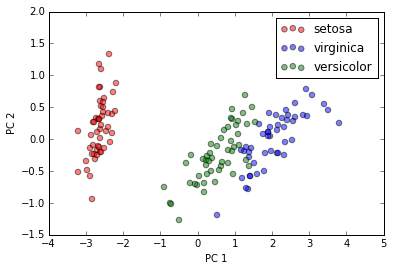

In [19]:
for species, color in [('setosa', 'red'), 
                       ('virginica', 'blue'), 
                       ('versicolor', 'green')]:
    z = iris['Species'] == species
    plt.scatter(X_D[z][:,0], X_D[z][:,1], c=color, alpha=0.5, s=30, label=species)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="best")

#### Multiple plots

The command `plt.subplot(r, c, i)` allows us to display the $i$th plot in a figure consisting of $r$ rows and $c$ columns.



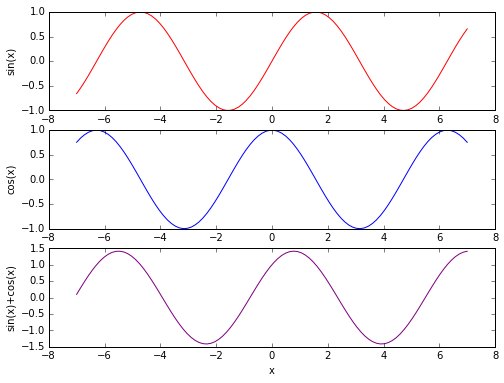

In [20]:
plt.figure(figsize=(8,6)) # Change width and height (inches)

plt.subplot(3,1,1)
plt.plot(x, numpy.sin(x), color='red')
plt.ylabel("sin(x)")

plt.subplot(3,1,2)
plt.plot(x, numpy.cos(x),color='blue')
plt.ylabel("cos(x)")

plt.subplot(3,1,3)
plt.plot(x, numpy.sin(x)+numpy.cos(x), color='purple')
plt.ylabel("sin(x)+cos(x)")
plt.xlabel("x")

plt.savefig('multiple.png')


#### Exercise 7.4

Load the data from [winequality-red.csv](winequality-red.csv) into a pandas DataFrame.
Create a figure with multiple subplots. Each subplot should be a scatterplot of one of the features in the data against the quality rating. Each subplot should also contain a legend with the name of the feature, and the correlation coefficient between it and the quality. 

- As an extra, add the linear regression line to each subplot.